## Day 47 Lecture 1 Assignment

In this assignment, we will apply k-means clustering to a dataset containing player-season statistics for NBA players from the past four years.

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

This dataset contains player-season statistics for NBA players from the past four years. Each row in this dataset represents a player's per-game averages for a single season. 

This dataset contains the following variables:

- Seas: season ('2019' = 2018-2019 season, '2018' = 2017-2018 season, etc.)
- Player: player name
- Pos: position
- Age: age
- Tm: team
- G: games played
- GS: games started
- MP: minutes played
- FG: field goals
- FGA: field goals attempted
- FG%: field goal percentage
- 3P: 3 pointers
- 3PA: 3 pointers attempted
- 3P%: 3 point percentage
- 2P: 2 pointers
- 2PA: 2 pointers attempted
- 2P%: 2 point percentage
- eFG%: effective field goal percentage
- FT: free throws
- FTA: free throws attempted
- FT%: free throw percentage
- ORB: offensive rebound
- DRB: defensive rebound
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: points

Load the dataset.

In [21]:
nba_data = pd.read_csv(r'C:\Users\Adam Parente\Documents\Python Scripts\thinkful_assignments\nba_player_seasons.csv')

In [22]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 30 columns):
Seas      2141 non-null int64
Player    2141 non-null object
Pos       2141 non-null object
Age       2141 non-null int64
Tm        2141 non-null object
G         2141 non-null int64
GS        2141 non-null int64
MP        2141 non-null float64
FG        2141 non-null float64
FGA       2141 non-null float64
FG%       2131 non-null float64
3P        2141 non-null float64
3PA       2141 non-null float64
3P%       1967 non-null float64
2P        2141 non-null float64
2PA       2141 non-null float64
2P%       2110 non-null float64
eFG%      2131 non-null float64
FT        2141 non-null float64
FTA       2141 non-null float64
FT%       2037 non-null float64
ORB       2141 non-null float64
DRB       2141 non-null float64
TRB       2141 non-null float64
AST       2141 non-null float64
STL       2141 non-null float64
BLK       2141 non-null float64
TOV       2141 non-null float64
PF      

In [23]:
nba_data=nba_data.dropna()

The goal is to cluster these player-seasons to identify potential player "archetypes".

Begin by removing players whose season did not meet one of the following criteria:
1. Started at least 20 games
2. Averaged at least 10 minutes per game

In [27]:
nba_data=nba_data[nba_data['GS']>=20]
nba_data=nba_data[nba_data['MP']>=10]

In [28]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 3 to 2139
Data columns (total 31 columns):
Seas            771 non-null int64
Player          771 non-null object
Pos             771 non-null object
Age             771 non-null int64
Tm              771 non-null object
G               771 non-null int64
GS              771 non-null int64
MP              771 non-null float64
FG              771 non-null float64
FGA             771 non-null float64
FG%             771 non-null float64
3P              771 non-null float64
3PA             771 non-null float64
3P%             771 non-null float64
2P              771 non-null float64
2PA             771 non-null float64
2P%             771 non-null float64
eFG%            771 non-null float64
FT              771 non-null float64
FTA             771 non-null float64
FT%             771 non-null float64
ORB             771 non-null float64
DRB             771 non-null float64
TRB             771 non-null float64
AST             7

Choose a subset of numeric columns that is interesting to you from an "archetypal" standpoint. 

We will choose the following basic statistics: **points, total rebounds, assists, steals, blocks**, and **turnovers**, but you should feel free to choose other reasonable feature sets if you like. Be careful not to include too many dimensions (curse of dimensionality).

- 3P: 3 pointers
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PTS: points

In [29]:
sub_data = nba_data[['3P','TRB','AST','STL','BLK','TOV','PTS']]

In [30]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 3 to 2139
Data columns (total 7 columns):
3P     771 non-null float64
TRB    771 non-null float64
AST    771 non-null float64
STL    771 non-null float64
BLK    771 non-null float64
TOV    771 non-null float64
PTS    771 non-null float64
dtypes: float64(7)
memory usage: 48.2 KB


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [32]:
scaler = StandardScaler()
sub_data_scaled = scaler.fit_transform(sub_data)




In [33]:
sub_data_scaled

array([[-1.43979394,  1.72130219, -0.65280583, ...,  0.90468682,
         0.00202423,  0.08230929],
       [-1.43979394,  0.84454991, -0.36683236, ...,  0.4820794 ,
        -0.23808092, -0.77758856],
       [-1.32453268,  1.60174506, -0.27150788, ...,  1.53859794,
         0.12207681,  1.3549581 ],
       ...,
       [ 0.75016986,  0.48587852, -0.74813031, ...,  0.90468682,
        -1.07844895, -0.29604576],
       [-1.32453268,  1.52204031, -0.55748134, ..., -0.15183172,
         0.24212938,  0.28868477],
       [-1.43979394,  0.40617377, -0.93877929, ...,  0.69338311,
        -0.95839637, -0.81198447]])

Run K-means clustering with K = 3 and print out the resulting centroids. When printing the centroids, transform the scaled centroids back into their corresponding unscaled values. What "archetypes" do you see?

In [34]:
clst = KMeans(n_clusters=3)
clst.fit(sub_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
centroids =scaler.inverse_transform(clst.cluster_centers_)

In [41]:
centroids_df =pd.DataFrame(centroids)

In [42]:
centroids_df

,0,1,2,3,4,5,6
0,0.508571,8.190857,1.980571,0.773714,1.176000,1.673143,13.578857
1,1.780925,5.346243,5.964740,1.372832,0.501156,2.816763,19.694220
2,1.338061,3.867849,2.153901,0.831678,0.350827,1.251300,10.790780


In [49]:
tall_centroids_df = pd.melt(centroids_df.reset_index(), "index")

In [51]:
tall_centroids_df

,index,variable,value
0,0,0,0.508571
1,1,0,1.780925
2,2,0,1.338061
3,0,1,8.190857
4,1,1,5.346243
5,2,1,3.867849
6,0,2,1.980571
7,1,2,5.964740
8,2,2,2.153901
9,0,3,0.773714


In [54]:
var_dic = {0: '3 pointers',
1: 'total rebounds',
2: 'assists',
3: 'steals',
4: 'blocks',
5: 'turnovers',
6: 'points'
          }

tall_centroids_df['variable']=tall_centroids_df['variable'].replace(var_dic)

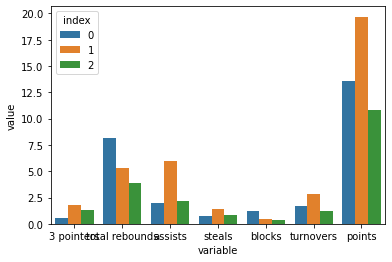

In [55]:
sns.barplot(data=tall_centroids_df,x='variable',y='value', hue='index')

Experiment with different values of K. Do any further interesting archetypes come out?

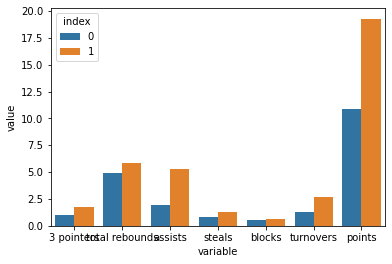

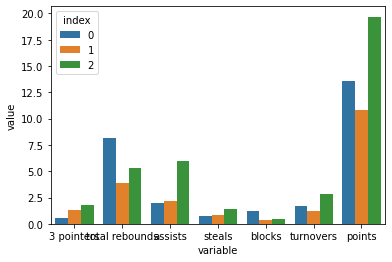

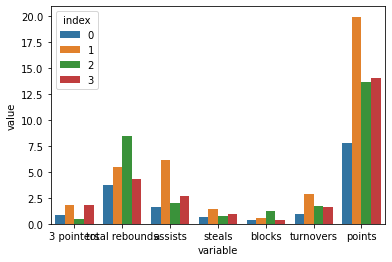

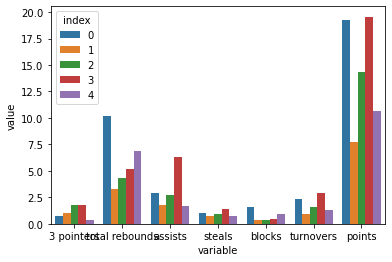

In [57]:
for k in range(2,6):
    clst = KMeans(n_clusters=k)
    clst.fit(sub_data_scaled)
    centroids =scaler.inverse_transform(clst.cluster_centers_)
    centroids_df =pd.DataFrame(centroids)
    tall_centroids_df = pd.melt(centroids_df.reset_index(), "index")
    tall_centroids_df['variable']=tall_centroids_df['variable'].replace(var_dic)
    sns.barplot(data=tall_centroids_df,x='variable',y='value', hue='index')
    plt.show()

Primarily there is one group of high performing players with some differentiation based on offensive and defense (blocks vs points).